<a href="https://colab.research.google.com/github/Asterisk07/BTP-Transformer-explainability/blob/main/vision_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision Transformers from scratch

- [ViT Blogpost by Francesco Zuppichini](https://towardsdatascience.com/implementing-visualttransformer-in-pytorch-184f9f16f632)
- [D2L Tutorial ](https://d2l.ai/chapter_attention-mechanisms-and-transformers/vision-transformer.html)
- [Brian Pulfer Medium Blogpost](https://medium.com/mlearning-ai/vision-transformers-from-scratch-pytorch-a-step-by-step-guide-96c3313c2e0c)
- [Lucidrains implementation Github ](https://github.com/lucidrains/vit-pytorch/blob/main/vit_pytorch/vit.py)

## Setup

In [188]:
# !pip install einops

In [189]:
import cv2
import numpy as np

## Image Patching



In [190]:
import torch

In [191]:

from torchvision.datasets import OxfordIIITPet
import matplotlib.pyplot as plt
from random import random
from torchvision.transforms import Resize, ToTensor
from torchvision.transforms.functional import to_pil_image

to_tensor = [Resize((144, 144)), ToTensor()]

class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image = t(image)
        return image, target

def preview_dataset(images, num_samples=40, cols=8):
    """ Plots some samples from the dataset """
    plt.figure(figsize=(15,15))
    idx = int(len(dataset) / num_samples)
    print(images)
    for i, img in enumerate(images):
        if i % idx == 0:
            plt.subplot(int(num_samples/cols) + 1, cols, int(i/idx) + 1)
            plt.imshow(to_pil_image(img[0]))

# 200 images for each pet
dataset = OxfordIIITPet(root=".", download=True, transforms=Compose(to_tensor))
print("Dataset fetched")
# preview_dataset(dataset)

Dataset fetched


In [192]:
# type(img) is torch.Tensor
SCALE = 0.5

In [193]:
def show_images(images, figsize = (15, 5), scale_factor = 1,titles=None):
    '''handles both tensors and images'''
    num_images = len(images)
    
    # Create a figure and set of subplots
    fig, axes = plt.subplots(1, num_images, figsize=np.array(figsize) * scale_factor)
    
    # Ensure axes is an array, even for a single image
    if num_images == 1:
        axes = [axes]
    
    # Display each image in a subplot
    for ax, img, title in zip(axes, images, titles or ['']*num_images):
        if type(img)  is torch.Tensor:
            img = img.permute(1, 2, 0).numpy()
        # Convert color images from BGR to RGB
        # if img.ndim == 3 and img.shape[2] == 3:
        #     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img, cmap='gray' if len(img.shape) == 2 or img.shape[-1] == 1 else None)
        ax.axis('off')  # Hide axis

        ax.set_title(title.title())  # Set the title for the subplot

    plt.show()
# show_images(images = [new_dataset[0][0]] ,scale_factor = SCALE,titles = ['color_img'])

In [194]:
from tqdm import tqdm


In [195]:
type(dataset)

torchvision.datasets.oxford_iiit_pet.OxfordIIITPet

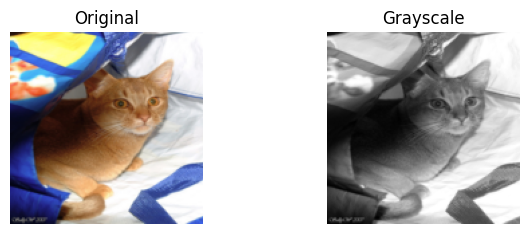

In [196]:
'''EDA : black and white'''
idx = 0
SCALE = 0.5

# ------------
img = dataset[idx][0]
# img = new_dataset[idx][0]
image_np = img.permute(1, 2, 0).numpy()
# Convert to NumPy array and transpose to (H, W, C)

gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)[:, :, np.newaxis] if image_np.shape[2] == 3 else image_np

# SCALE = 75/100

show_images(images = [img, gray_image,] ,scale_factor = SCALE,titles = ['original', 'grayscale'])
# show_images(images = [grey_image, bw_image, x,] ,scale_factor = SCALE,titles = ['Greyscale','B/W','One color per row'])

In [197]:
old_dataset = dataset

In [198]:
new_dataset = list()

In [199]:
from tqdm import tqdm

In [200]:
raise Exception("tunring blck and whte")
go to cell tk yajat and run from there untill you get IOError

SyntaxError: invalid syntax (3646228511.py, line 2)

In [ ]:
'''preprocessing : black and white'''
for idx in tqdm(range(len(dataset))):
    img = dataset[idx][0]
    image_np = img.permute(1, 2, 0).numpy()
    # Convert to NumPy array and transpose to (H, W, C)

    # image_np = (image_np * 255).astype(np.uint8)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)[:, :, np.newaxis]
    grey_tensor = torch.from_numpy(gray_image).permute(2,0,1)
    # Convert to convert to (1,H,W)

    
    # label = dataset[k][1]
    label = dataset[idx][1]
    new_dataset.append((grey_tensor,label))
print(len(new_dataset)) 
    


In [ ]:
img_dict={}
for i in tqdm(range(len(new_dataset))):
    label=new_dataset[i][1]
    if(label not in img_dict):
        img_dict[new_dataset[i][1]]=[]
    img_dict[label].append(i)


100%|██████████| 3680/3680 [00:00<00:00, 208719.81it/s]


In [ ]:
print(img_dict)

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895], 1: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945],

100%|██████████| 37/37 [00:00<00:00, 185.65it/s]


AttributeError: 'int' object has no attribute 'title'

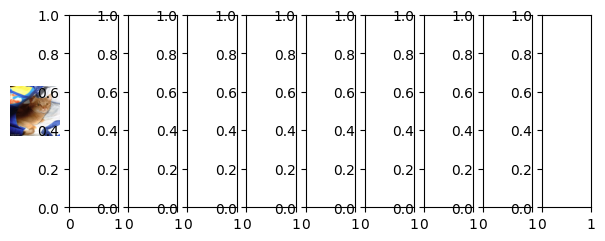

In [ ]:
title=[]
images=[]
SCALE=0.5
for i in tqdm(img_dict):
    for j in range(1):
        idx=img_dict[i][j]
        img=dataset[idx][0]
        # label=
        images.append(img)
        title.append(i)
        # title.append(idx)
    
# show_images(images ,SCALE,title)
for i in range(len(images)//10+1):

    show_images(images = images[i:i+10] ,scale_factor = SCALE,titles = title[i:i+10])



    


In [ ]:
for i in img_dict:

    print(img_dict[i][:50])
    print('')
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]

[150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]

[200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

In [ ]:
show_images(images = images[0:50] ,scale_factor = 0.35,titles = None)

AttributeError: 'int' object has no attribute 'title'

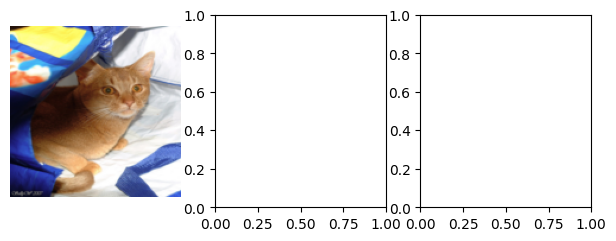

In [ ]:

for i in range(15):
    show_images(images = images[i:i+3] ,scale_factor = SCALE,titles = title[i:i+3])

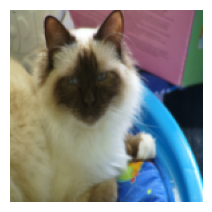

In [ ]:
n=300
show_images(images = [dataset[n][0]] ,scale_factor = SCALE,titles = None)

3680

In [ ]:
binary_label_dict = {}

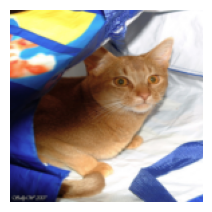

0 th image set to cat


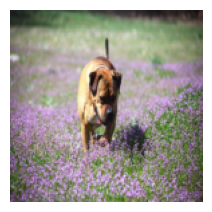

50 th image set to dog


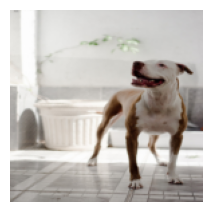

100 th image set to dog


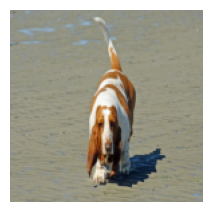

150 th image set to dog


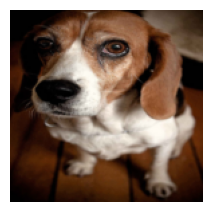

200 th image set to dog


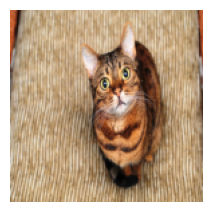

250 th image set to cat


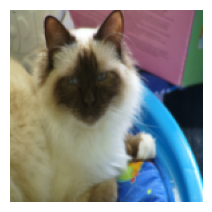

300 th image set to cat


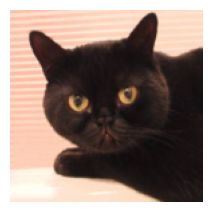

350 th image set to cat


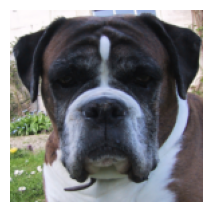

400 th image set to dog


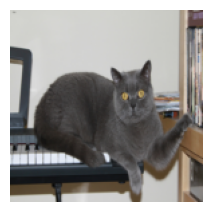

450 th image set to cat


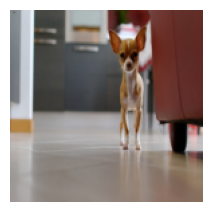

500 th image set to dog


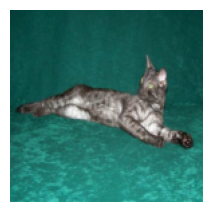

550 th image set to cat


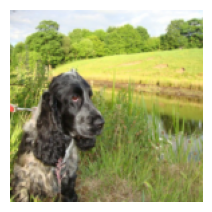

600 th image set to dog


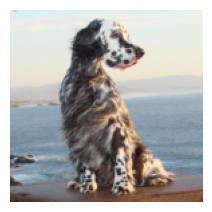

650 th image set to dog


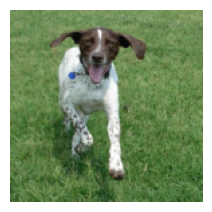

700 th image set to dog


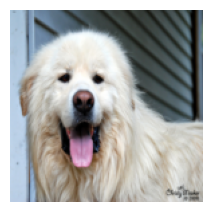

750 th image set to dog


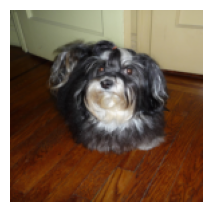

800 th image set to dog


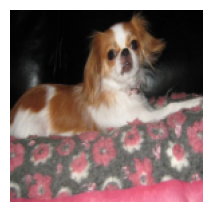

850 th image set to dog


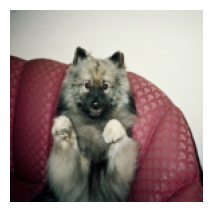

900 th image set to cat


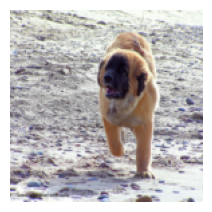

950 th image set to dog


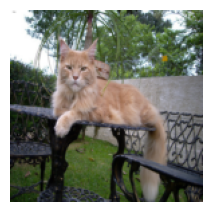

1000 th image set to cat


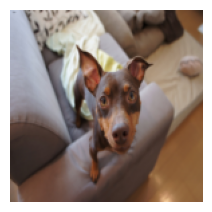

1050 th image set to dog


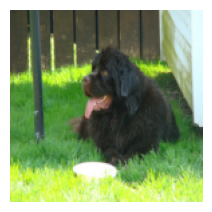

1100 th image set to dog


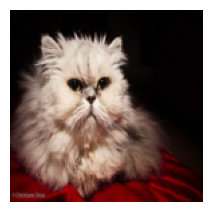

1150 th image set to cat


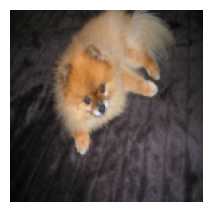

1200 th image set to None


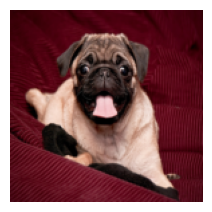

1250 th image set to dog


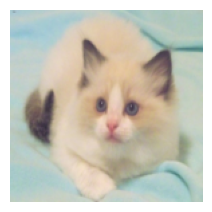

1300 th image set to cat


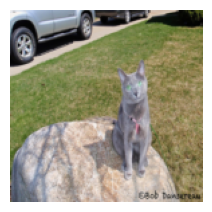

1350 th image set to cat


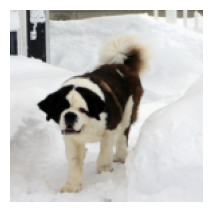

1400 th image set to dog


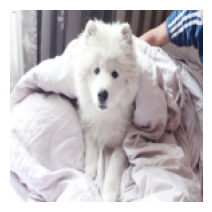

1450 th image set to dog


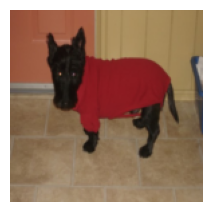

1500 th image set to None


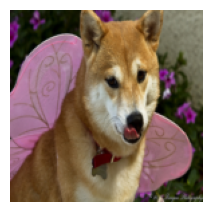

1550 th image set to dog


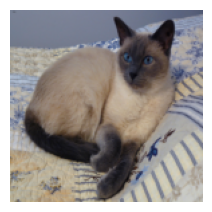

1600 th image set to cat


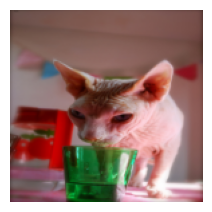

1650 th image set to None


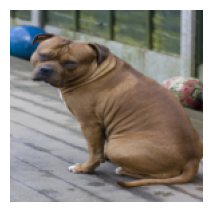

1700 th image set to dog


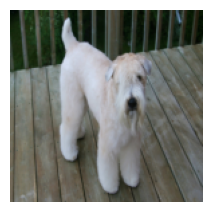

1750 th image set to dog


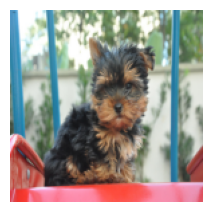

1800 th image set to dog


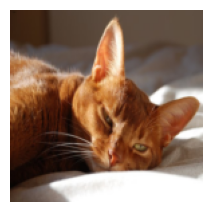

1850 th image set to cat


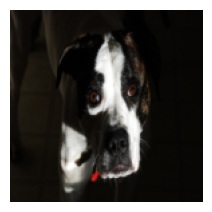

1900 th image set to dog


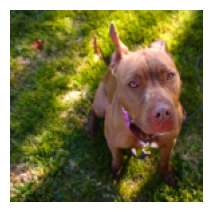

1950 th image set to dog


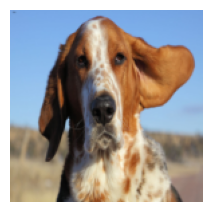

2000 th image set to dog


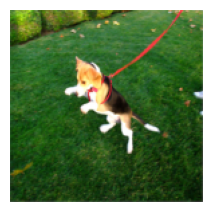

2050 th image set to cat


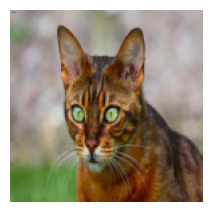

2100 th image set to cat


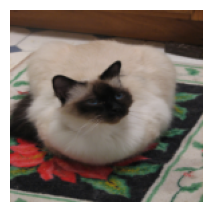

2150 th image set to cat


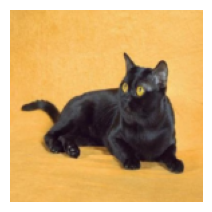

2200 th image set to cat


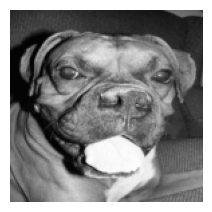

2250 th image set to cat


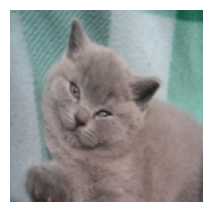

2300 th image set to cat


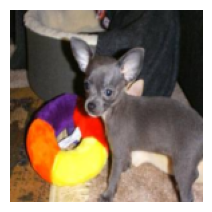

2350 th image set to None


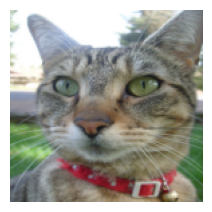

2400 th image set to cat


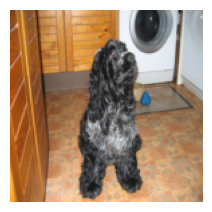

2450 th image set to None


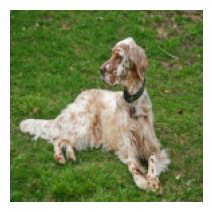

2500 th image set to dog


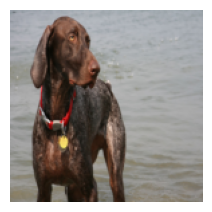

2550 th image set to dog


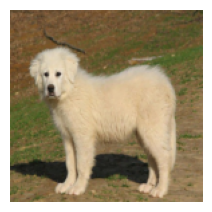

2600 th image set to dog


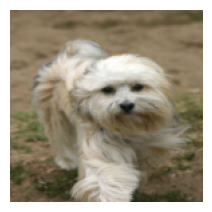

2650 th image set to dog


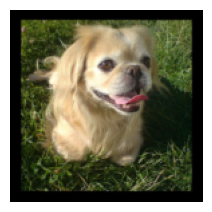

2700 th image set to dog


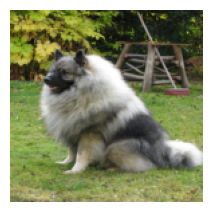

2750 th image set to None


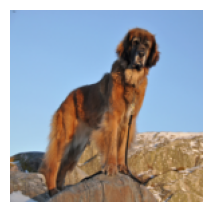

2800 th image set to None


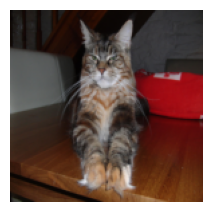

2850 th image set to cat


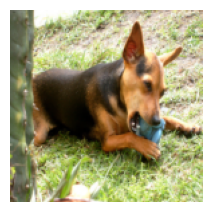

2900 th image set to dog


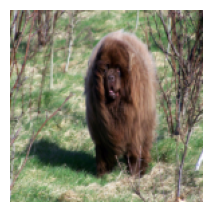

2950 th image set to dog


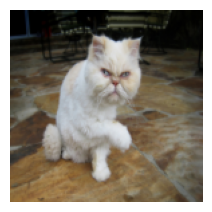

3000 th image set to cat


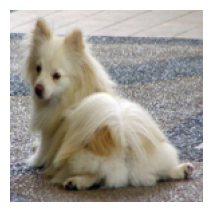

3050 th image set to dog


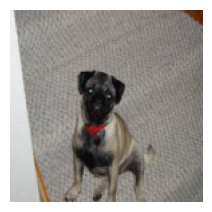

3100 th image set to dog


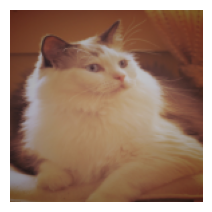

3150 th image set to cat


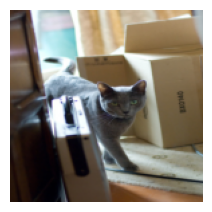

3200 th image set to cat


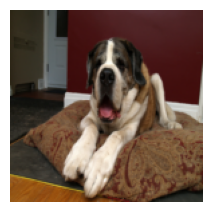

3250 th image set to dog


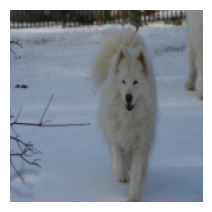

3300 th image set to dog


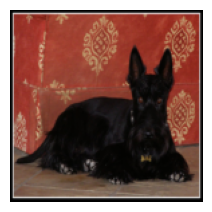

3350 th image set to dog


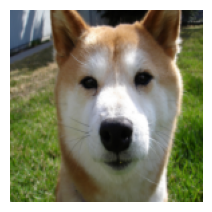

3400 th image set to dog


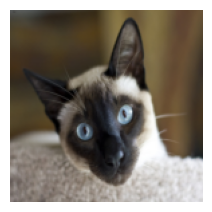

3450 th image set to cat


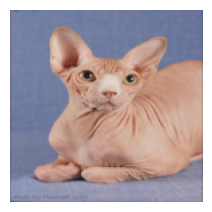

3500 th image set to cat


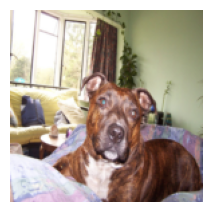

3550 th image set to dog


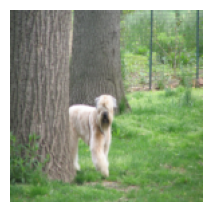

3600 th image set to dog


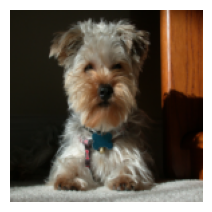

3650 th image set to dog


In [ ]:
N =len(dataset)
l1 = ['dog','cat']
for i in range(0,N,50):
    show_images(images = [dataset[i][0]] ,scale_factor = SCALE,titles = None)
    label = int(input('Enter 1 for cat, 0 for dog, -1 otherwise'))
    binary_label_dict[i] = label

    print(f"{i} th image set to {l1[label] if label!=-1 else None}")

In [201]:
# tk yajat

In [202]:
import gzip
import pickle

# Save the list to a gzipped file
# with gzip.open('binary_label_dict.gz', 'wb') as f:
#     pickle.dump(binary_label_dict, f)

# # Load the list from the gzipped file
with gzip.open('new_labels.gz', 'rb') as f:
    loaded_labels = pickle.load(f)
# with gzip.open('binary_label_dict.gz', 'rb') as f:
#     loaded_labels = pickle.load(f)

# # Display the loaded list
# print("Loaded list:", loaded_list)


In [203]:
new_labels = {}

In [204]:
N =len(dataset)
l1 = ['dog','cat']

In [212]:
loaded_labels

{0: '1',
 50: 'y',
 100: 'y',
 150: 'y',
 200: 'y',
 250: 'y',
 300: 'y',
 350: 'y',
 400: 'y',
 450: 'y',
 500: 'y',
 550: 'y',
 600: 'y',
 650: 'y',
 700: 'y',
 750: 'y',
 800: 'y',
 850: 'y',
 900: 'y',
 950: 'y',
 1000: 'y',
 1050: 'y',
 1100: 'y',
 1150: 'y',
 1200: 'y',
 1250: 'y',
 1300: 'y',
 1350: 'y',
 1400: 'y',
 1450: 'y',
 1500: 'y',
 1550: 'y',
 1600: 'y',
 1650: '1',
 1700: 'y',
 1750: 'y',
 1800: 'y',
 1850: 'y',
 1900: 'y',
 1950: 'y',
 2000: 'y',
 2050: 'y',
 2100: 'y',
 2150: 'y',
 2200: 'y',
 2250: '0',
 2300: 'y',
 2350: 'y',
 2400: 'y',
 2450: 'y',
 2500: 'y',
 2550: 'y',
 2600: 'y',
 2650: 'y',
 2700: 'y',
 2750: 'y',
 2800: '0',
 2850: 'y',
 2900: 'y',
 2950: 'y',
 3000: 'y',
 3050: 'y',
 3100: 'y',
 3150: 'y',
 3200: 'y',
 3250: 'y',
 3300: 'y',
 3350: 'y',
 3400: 'y',
 3450: 'y',
 3500: 'y',
 3550: 'y',
 3600: 'y',
 3650: 'y'}

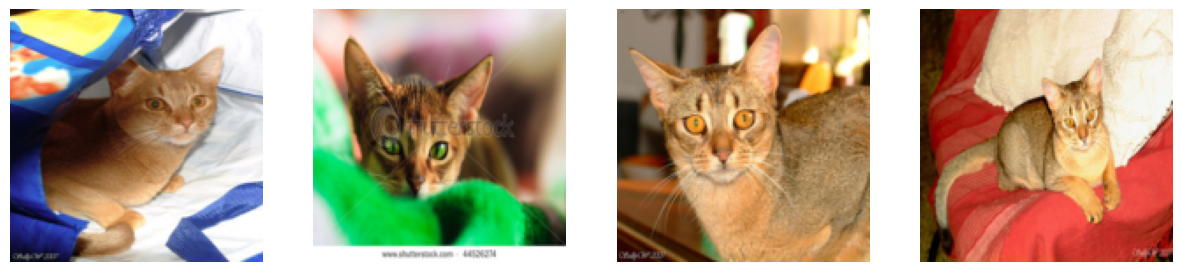

<class 'str'>


TypeError: list indices must be integers or slices, not str

In [206]:

# N = 100

context_length = 4
for i in range(0,N,50):
    show_images(images = [dataset[j][0] for j in range(i,i+context_length)] ,scale_factor = 1,titles = None)
    # label = int(input('Enter 1 for cat, 0 for dog, -1 otherwise'))
    # binary_label_dict[i] = label
    label = loaded_labels[i]
    print(type(label))
    print(f"Current label :  {l1[label] if label!=-1 else None}")

    label = (input('Enter "y" to keep the current label, else Enter 1 for cat, 0 for dog, -1 otherwise'))
    if(label=='y'):
        print(f"{i} th image remains same as {loaded_labels[i]}")
    else:
        print(f"{i} th image set to {l1[int(label)] if int(label)!=-1 else None}")
    new_labels[i] = label
    
    

In [ ]:
set :
1200 , 0
1500, 0
1650, 1
2050, 0
2250, 0
2350, 0
2450, 0
2750, 0


In [ ]:
raise IOError

ZeroDivisionError: 

In [ ]:
del title

tensor(0)


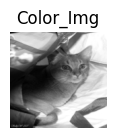

In [ ]:
type(images[0])
title[0]
print((new_dataset[0][0]!=images[0]).sum())
show_images(images =[images[0]],0.5,titles = ['color_img'])
# show_images(images = [images[0]] ,scale_factor = SCALE,titles = ['color_img'])
# images

In [ ]:
new_dataset[0][0].type


<function Tensor.type>

In [ ]:
dataset[0][0]
dataset[0][0].shape

torch.Size([3, 144, 144])

In [ ]:
# dataset = new_dataset

In [ ]:

# new_dataset_tensor = torch.tensor(new_dataset)

In [ ]:

gray_image=np.reshape(gray_image, (1, gray_image.shape[0], gray_image.shape[1]))



In [ ]:
tensor = torch.from_numpy(gray_image)

tensor([[[0.4801, 0.4431, 0.3834,  ..., 0.0232, 0.0235, 0.0225],
         [0.5746, 0.5261, 0.4984,  ..., 0.0235, 0.0235, 0.0235],
         [0.6530, 0.6122, 0.6091,  ..., 0.0232, 0.0235, 0.0231],
         ...,
         [0.1994, 0.2111, 0.2198,  ..., 0.1680, 0.1664, 0.1644],
         [0.1965, 0.2035, 0.2216,  ..., 0.1718, 0.1599, 0.1632],
         [0.2031, 0.2211, 0.2143,  ..., 0.1637, 0.1568, 0.1632]]])


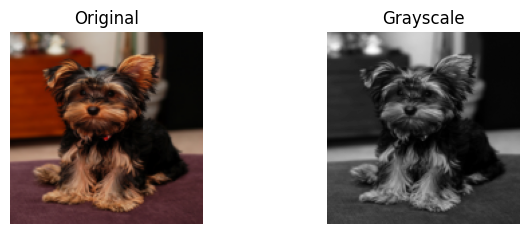

In [ ]:


import torch.nn.functional as F

def downsample_image_tensor(image_tensor, factor):
    """
    Downsample a 3D image tensor (1, H, W) by a given factor.

    Args:
        image_tensor (torch.Tensor): The input image tensor of shape (1, H, W).
        factor (int): The factor by which to downsample the image.

    Returns:
        torch.Tensor: The downsampled image tensor with shape (1, new_H, new_W).
    """
    # Ensure the input tensor is a 3D tensor of shape (1, H, W)
    if len(image_tensor.shape) != 3 or image_tensor.shape[0] != 1:
        raise ValueError("Input tensor must be a 3D tensor of shape (1, H, W).")
    
    # Add a batch dimension to the tensor
    image_tensor = image_tensor.unsqueeze(0)  # Now shape is (1, 1, H, W)

    # Calculate the new size
    new_size = (image_tensor.shape[2] // factor, image_tensor.shape[3] // factor)

    # Downsample the image using bilinear interpolation
    downsampled_image_tensor = F.interpolate(image_tensor, size=new_size, mode='bilinear', align_corners=False)

    # Remove the batch dimension
    downsampled_image_tensor = downsampled_image_tensor.squeeze(0)  # Now shape is (1, new_H, new_W)

    return downsampled_image_tensor


#hyperparameter
factor=2

downsampledImage=downsample_image_tensor(tensor,factor)
print(downsampledImage)

show_images(images = [img, tensor,] ,scale_factor = SCALE,titles = ['original', 'grayscale'])


# # Example usage
# image_tensor = torch.randn(1, 256, 256)  # Example image tensor of shape (1, H, W)
# factor = 2

# downsampled_image_tensor = downsample_image_tensor(image_tensor, factor)
# print(downsampled_image_tensor.shape)  # Output shape should be (1, 128, 128)


In [ ]:
for i in range(len(new_dataset)):
    # newTensor=new_dataset[i][0]
    downsample_image_tensor(new_dataset[i][0],factor)





In [ ]:
tensor.shape

torch.Size([1, 144, 144])

In [ ]:
len(dataset)

3680

In [ ]:
t1 = (dataset[0])

In [ ]:
img = t1[0]
label = t1[1]

In [ ]:
d1 = {}

In [ ]:
l1 =[]

In [ ]:
def _show_images(images, num_samples=40, cols=8):
    c = 1
    """ Plots some samples from the dataset """
    plt.figure(figsize=(15,15))
    idx = int(len(dataset) / num_samples)
    print(images)
    for i, img in enumerate(images):
        # if i % idx == 0:
        if img[1] == 0 :
            l1.append(i)
        #     c+=1
        #     print("c = ",c)
        #     plt.subplot(int(num_samples/cols) + 1, cols, int(i/idx) + 1)
            # plt.imshow(to_pil_image(img[0]))
# _show_images(dataset)

Dataset OxfordIIITPet
    Number of datapoints: 3680
    Root location: .


KeyboardInterrupt: 

<Figure size 1500x1500 with 0 Axes>

In [ ]:
len(dataset[0])

2

In [ ]:
type(dataset)

torchvision.datasets.oxford_iiit_pet.OxfordIIITPet

In [ ]:
sorted(d1.values())

[]

In [ ]:
l1

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 1846,
 1847,
 1848,
 1849,
 1850,
 1851,
 1852,
 1853,
 1854,
 1855,
 1856,
 1857,
 1858,
 1859,
 1860,
 1861,
 1862,
 1863,
 1864,
 1865,
 1866,
 1867,
 1868,
 1869,
 1870,
 1871,
 1872,
 1873,
 1874,
 1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895]

In [ ]:
d1

{}

### Patch Images

- The following is mainly from the above implementations (not my code)

In [ ]:
from torch import nn
from einops.layers.torch import Rearrange
from torch import Tensor


class PatchEmbedding(nn.Module):
    def __init__(self, in_channels = 3, patch_size = 8, emb_size = 128):
        self.patch_size = patch_size
        super().__init__()
        self.projection = nn.Sequential(
            # break-down the image in s1 x s2 patches and flat them
            Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=patch_size, p2=patch_size),
            nn.Linear(patch_size * patch_size * in_channels, emb_size)
        )

    def forward(self, x: Tensor) -> Tensor:
        x = self.projection(x)
        return x

# Run a quick test

sample_datapoint = torch.unsqueeze(new_dataset[0][0], 0)
print("Initial shape: ", sample_datapoint.shape)
embedding = PatchEmbedding(1,1,144)(sample_datapoint)
print("Patches shape: ", embedding.shape)

Initial shape:  torch.Size([1, 1, 144, 144])
Patches shape:  torch.Size([1, 20736, 144])


## Model

Let's first implement all of the transformer building blocks. These blocks are inspired by the implementations linked above. I've left out some dropouts and normalizations at some places.

In [ ]:
from einops import rearrange

class Attention(nn.Module):
    def __init__(self, dim, n_heads, dropout):
        super().__init__()
        self.n_heads = n_heads
        self.att = torch.nn.MultiheadAttention(embed_dim=dim,
                                               num_heads=n_heads,
                                               dropout=dropout)
        self.q = torch.nn.Linear(dim, dim)
        self.k = torch.nn.Linear(dim, dim)
        self.v = torch.nn.Linear(dim, dim)

    def forward(self, x):
        q = self.q(x)
        k = self.k(x)
        v = self.v(x)
        attn_output, attn_output_weights = self.att(x, x, x)
        return attn_output

In [ ]:
Attention(dim=128, n_heads=4, dropout=0.)(torch.ones((1, 5, 128))).shape

torch.Size([1, 5, 128])

In [ ]:
class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.fn = fn
    def forward(self, x, **kwargs):
        return self.fn(self.norm(x), **kwargs)

In [ ]:
norm = PreNorm(128, Attention(dim=128, n_heads=4, dropout=0.))
norm(torch.ones((1, 5, 128))).shape

torch.Size([1, 5, 128])

In [ ]:
class FeedForward(nn.Sequential):
    def __init__(self, dim, hidden_dim, dropout = 0.):
        super().__init__(
            nn.Linear(dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, dim),
            nn.Dropout(dropout)
        )
ff = FeedForward(dim=128, hidden_dim=256)
ff(torch.ones((1, 5, 128))).shape

torch.Size([1, 5, 128])

In [ ]:
class ResidualAdd(nn.Module):
    # skip level
    def __init__(self, fn):
        super().__init__()
        self.fn = fn

    def forward(self, x, **kwargs):
        res = x
        x = self.fn(x, **kwargs)
        x += res
        return x

In [ ]:
residual_att = ResidualAdd(Attention(dim=128, n_heads=4, dropout=0.))
residual_att(torch.ones((1, 5, 128))).shape

torch.Size([1, 5, 128])

- Not all parameters are like in the original implementation
- Some Dropouts & Norms are missing

In [ ]:
from einops import repeat

class ViT(nn.Module):
    def __init__(self, ch=1, img_size=144, patch_size=4, emb_dim=32,
                n_layers=6, out_dim=37, dropout=0.1, heads=2):
        super(ViT, self).__init__()

        # Attributes
        self.channels = ch
        self.height = img_size
        self.width = img_size
        self.patch_size = patch_size
        self.n_layers = n_layers
        
        # Patching
        
        self.patch_embedding = PatchEmbedding(in_channels=ch,
                                              patch_size=patch_size,
                                              emb_size=emb_dim)
        # Learnable params
        num_patches = (img_size // patch_size) ** 2
        self.pos_embedding = nn.Parameter(
            torch.randn(1, num_patches + 1, emb_dim))
        self.cls_token = nn.Parameter(torch.rand(1, 1, emb_dim))

        # Transformer Encoder
        self.layers = nn.ModuleList([])
        for _ in range(n_layers):
            transformer_block = nn.Sequential(
                ResidualAdd(PreNorm(emb_dim, Attention(emb_dim, n_heads = heads, dropout = dropout))),
                ResidualAdd(PreNorm(emb_dim, FeedForward(emb_dim, emb_dim, dropout = dropout))))
            self.layers.append(transformer_block)

        # Classification head
        self.head = nn.Sequential(nn.LayerNorm(emb_dim), nn.Linear(emb_dim, out_dim))


    def forward(self, img):
        # Get patch embedding vectors

       
        x = self.patch_embedding(img)
        b, n, _ = x.shape

        # Add cls token to inputs
        cls_tokens = repeat(self.cls_token, '1 1 d -> b 1 d', b = b)
        x = torch.cat([cls_tokens, x], dim=1)
        x += self.pos_embedding[:, :(n + 1)]

        # Transformer layers
        for i in range(self.n_layers):
            x = self.layers[i](x)

        # Output based on classification token
        return self.head(x[:, 0, :])

channels=1
patchsize=4
imgsize=144
emb_dim=32
# channels=3
# patchsize=4
# imgsize=144
# model = ViT()
# model = ViT(channels,patchsize,imgsize)
model = ViT(channels,imgsize,patchsize,emb_dim)
print(model)
model(torch.ones((1, 1, 144, 144)))


ViT(
  (patch_embedding): PatchEmbedding(
    (projection): Sequential(
      (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=4, p2=4)
      (1): Linear(in_features=16, out_features=32, bias=True)
    )
  )
  (layers): ModuleList(
    (0-5): 6 x Sequential(
      (0): ResidualAdd(
        (fn): PreNorm(
          (norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
          (fn): Attention(
            (att): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
            )
            (q): Linear(in_features=32, out_features=32, bias=True)
            (k): Linear(in_features=32, out_features=32, bias=True)
            (v): Linear(in_features=32, out_features=32, bias=True)
          )
        )
      )
      (1): ResidualAdd(
        (fn): PreNorm(
          (norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
          (fn): FeedForward(
            (0): Linear(in_features=32, out_featu

tensor([[ 0.1216,  0.5847, -0.3318,  0.1117, -0.5564,  1.0624,  1.0077, -0.1159,
         -0.1123,  0.2346, -0.5768,  0.1562, -0.2962,  0.1119,  0.2782,  0.0941,
          0.0481,  0.9103, -0.0037, -0.0512,  0.8919,  0.4904, -0.1964, -0.0238,
         -0.3951,  1.5087,  0.4426,  0.1175,  0.2803,  0.7492, -0.2713,  0.6494,
         -0.4365,  0.6339,  0.0670, -2.3544,  0.3881]],
       grad_fn=<AddmmBackward0>)

In [ ]:
# EDA block patchsize vs num_params
x =list( np.arange(1,128,2))
y = list()
for i in x:
    model = ViT(patch_size=i).to(device)
    p = model
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad) / 101157
    y.append(num_params)

plt.plot(x,y)
plt.xticks(ticks=np.arange(1,128,6))
plt.yticks(ticks=np.arange(0,8,0.5))
plt.title("Patchsize efffect on num_params")
plt.show()

## Training

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import random_split

train_split = int(0.8 * len(new_dataset))
train, test = random_split(new_dataset, [train_split, len(new_dataset) - train_split])

train_dataloader = DataLoader(train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test, batch_size=32, shuffle=True)

In [ ]:
type(dataset)
# print(dataset)
# dataset.shape

torchvision.datasets.oxford_iiit_pet.OxfordIIITPet

In [ ]:
# del
# new_dataset.shape

In [ ]:

from tqdm import tqdm

In [ ]:
# hyperparameters
max_iters = 1000
eval_interval = 100

In [ ]:
import time

In [ ]:
import torch.optim as optim
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {device}")
model = ViT().to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


# for epoch in range(1000):
for epoch in tqdm(range(1,max_iters + 1)):
    epoch_losses = []
    model.train()
    for step, (inputs, labels) in enumerate(train_dataloader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
    if epoch % eval_interval == 0 or epoch == max_iters - 1:
        train_loss =  np.mean(epoch_losses)
        epoch_losses = []
        model.eval()
        for step, (inputs, labels) in enumerate(test_dataloader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)


            epoch_losses.append(loss.item())
        test_loss =  np.mean(epoch_losses)
        print(f"step {epoch}: train loss {train_loss:.4f}, test loss {test_loss:.4f}")


Using device: cpu


  0%|          | 3/1000 [03:44<20:42:41, 74.79s/it]


KeyboardInterrupt: 

In [ ]:
for step, (inputs, labels) in enumerate(train_dataloader):
    print(inputs.shape)

torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size([32, 1, 144, 144])
torch.Size

In [ ]:
inputs, labels = next(iter(test_dataloader))
inputs, labels = inputs.to(device), labels.to(device)
outputs = model(inputs)

print("Predicted classes", outputs.argmax(-1))
print("Actual classes", labels)

Predicted classes tensor([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
       device='cuda:0')
Actual classes tensor([ 7, 23,  6, 25, 18,  1, 34, 28,  8,  0, 34, 10, 34, 33, 16, 17, 27, 10,
        16,  7,  0,  1,  5, 11, 11, 12, 21, 25, 25,  8, 10, 16],
       device='cuda:0')


In [ ]:

import torch

# Assuming you have already defined `test_dataloader` and `model`

# Move model to the correct device
model.to(device)

# Set model to evaluation mode
model.eval()

# Initialize variables to track the total and correct predictions
total = 0
correct = 0
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        # Get the predicted classes
        _, predicted = torch.max(outputs, 1)

        # Update the total number of samples
        total += labels.size(0)

        # Update the number of correct predictions
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct / total

print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 1.09


This needs to train much longer :)